# Data Preparation

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/mac/code/TshepoKubeka/O-list/notebooks'

In [3]:
csv_path = os.path.join('..', 'O-list', 'data','csv')
csv_path

'../O-list/data/csv'

In [4]:
import pandas as pd
pd.read_csv(os.path.join(csv_path, 'olist_sellers_dataset.csv')).head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## File names containing ".csv"

In [5]:
file_names = [f for f in os.listdir(csv_path) if f.endswith('.csv')]
file_names

['olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv']

## List of key names without .csv

In [6]:
key_names = [key_name
    .replace('olist_','')
    .replace('_dataset','')
    .replace('.csv','')
    for key_name in file_names]
key_names

['sellers',
 'product_category_name_translation',
 'orders',
 'order_items',
 'customers',
 'geolocation',
 'order_payments',
 'order_reviews',
 'products']

## Construct Dict for the Data

EG.

data = {'sellers': Dataframe1, 'orders': Dataframe2, .....}

In [7]:
data = {}
for k,f in zip(key_names, file_names):
    data[k] = pd.read_csv(os.path.join(csv_path, f))
data.keys()

dict_keys(['sellers', 'product_category_name_translation', 'orders', 'order_items', 'customers', 'geolocation', 'order_payments', 'order_reviews', 'products'])

In [8]:
data['products']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


# Exploratory Analysis

Each transaction on the Olist ecommerce platform is characterized by:
- a `customer_id`, that would buy...
- various`product_id`...
- to a `seller_id`...
- and leaves a `rewiew_id`...
- all this belonging to an `order_id`

## - Run an automated exploratory analysis with [pandas profiling](https://github.com/pandas-profiling/pandas-profiling)

In [9]:
!pip install --quiet pandas-profiling

In [10]:
!mkdir -p ../../O-list/data/reports

In [11]:
import pandas_profiling

datasets_to_profile = ['orders', 'products', 'sellers',
                  'customers', 'order_reviews',
                  'order_items']

👉 Create and save one `html report` per dataset to profile 

In [12]:
#for d in datasets_to_profile:
 #   print('exporting: '+d)
  #  profile = data[d].profile_report(title='Report for '+d)
   # profile.to_file(output_file="../../O-list/data/reports/"+d+'.html');

##  Investigate the cardinalities of your various DataFrames

❓ **How many unique `orders`, `reviews`, `sellers`, `products` and `customers` are there ?**  

In [13]:
aggregates = np.array([
    [
        data["orders"].order_id.nunique(),
        data["order_reviews"].review_id.nunique(),
        data["sellers"].seller_id.nunique(),
        data["products"].product_id.nunique(),
        data["customers"].customer_id.nunique(),
    ],
    [
        data["orders"].order_id.count(),
        data["order_reviews"].review_id.count(),
        data["sellers"].seller_id.count(),
        data["products"].product_id.count(),
        data["customers"].customer_id.count(),
    ],
])

pd.DataFrame(data=np.vstack((aggregates, aggregates[0,:]/aggregates[1,:])).T,
             index=['orders', 'reviews', 'sellers', 'products', 'customers'],
            columns=['nunique', 'count','ratio'])

,nunique,count,ratio
orders,99441.0,99441.0,1.000000
reviews,98410.0,99224.0,0.991796
sellers,3095.0,3095.0,1.000000
products,32951.0,32951.0,1.000000
customers,99441.0,99441.0,1.000000


❓ **How many reviews are there per order? Do we have reviews for all orders ?**

This info is not directly accessible in our individual csv hence we need to proceed to merge.


In [14]:
orders = data['orders'][['customer_id', 'order_id']]
reviews = data['order_reviews'][['order_id', 'review_id']]
items = data['order_items'][['order_id', 'product_id','seller_id']]

In [15]:
orders_reviews = orders.merge(reviews, on='order_id', how='outer')
orders_reviews.head(2)

,customer_id,order_id,review_id
0,9ef432eb6251297304e76186b10a928d,e481f51cbdc54678b7cc49136f2d6af7,a54f0611adc9ed256b57ede6b6eb5114
1,b0830fb4747a6c6d20dea0b8c802d7ef,53cdb2fc8bc7dce0b6741e2150273451,8d5266042046a06655c8db133d120ba5


In [16]:
# Check missing reviews?
orders_reviews.isna().sum()

customer_id      0
order_id         0
review_id      768
dtype: int64

☝️ Nearly all orders have a review, except 768 out of 100k (less than 0.7% missing)

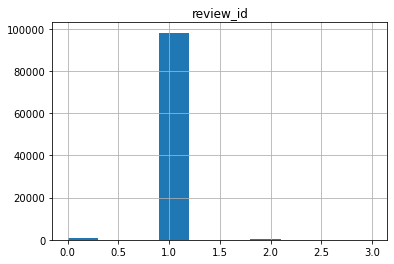

In [17]:
# We need to add the following magic command to make sure the plot displays correctly!
%matplotlib inline

# Check for max number of reviews per order
orders_reviews.groupby(["order_id", "customer_id"]).count().hist();

☝️ Nearly all orders have only one review per customer. We are safe!

In [18]:
#number of missing reviews
n_missing_reviews = orders_reviews.isna().sum()['review_id']

# Olist's Metric Design 

Here, we are going to catch a first glimpse into `Olist's business health` graphs.

- Review score

<AxesSubplot:xlabel='review_score', ylabel='count'>

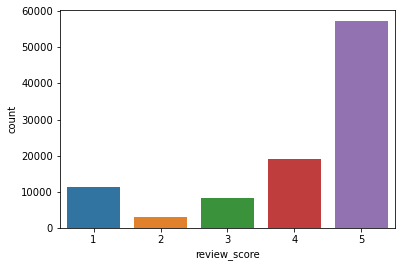

In [19]:
sns.countplot(x='review_score', data=data['order_reviews'])

- Order status

<AxesSubplot:xlabel='order_status', ylabel='count'>

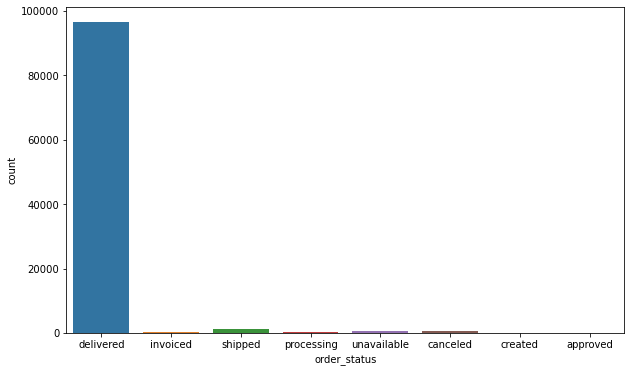

In [20]:
plt.figure(figsize = (10,6))
sns.countplot(data = data['orders'], x = 'order_status')

❓ How many orders were delivered,shipped or canceled ? ...

In [21]:
data['orders']['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

We know that each `review` has a unique `order`.

🤔 Do all `orders` have a `review`?

In [22]:
orders_reviews = data['orders'].merge(data['order_reviews'], on='order_id', how='left')
orders_reviews[['order_id','review_score']].isna().sum()

order_id          0
review_score    768
dtype: int64

If some orders were not reviewed, we're going to count and group them per `order_status`.

In [23]:
orders_reviews.groupby(['order_status'])['review_score'].apply(lambda s: s.isna().sum()).sort_values(ascending = False)

order_status
delivered      646
shipped         75
canceled        20
unavailable     14
processing       6
invoiced         5
created          2
approved         0
Name: review_score, dtype: int64

## Key business metrics over the past 14 months

**Metrics**

1. Which metric should we use as a `key business output metric`for Olist  📈 ? 
2. Which metric should we use to measure that a customer had a `good experience with Olist` 🙂 ? 
3. Which metric should we use to measure `shipping delay` 🕗?

For each metric, we are going to plot a trend line over time.

### Metric 1: Order numbers

❓ Plot the weekly number of total orders per week (to check how business is going)  


In [24]:
# Orders dataset
orders = data['orders'].copy()
# Handle datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders = orders.set_index('order_purchase_timestamp').sort_index()

Text(0.5, 1.0, 'weekly orders (total)')

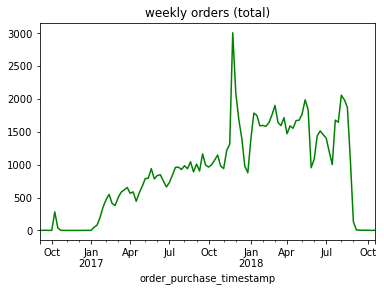

In [25]:
orders.resample('W')['order_id'].count().plot(color='g')
plt.title('weekly orders (total)')

❓ A visualization of the weekly number of non-delivered orders (to check for any potential issues)

Text(0.5, 1.0, 'weekly non-delivered orders')

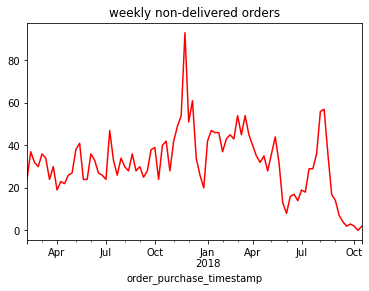

In [26]:
orders.sort_index().query("order_status != 'delivered'").loc['2017-02-01':].resample('W')['order_id'].count().plot(color='r')
plt.title('weekly non-delivered orders')

### Metric 2: Total payment values
❓ After plotting the total number of orders, we could also have a look at the weekly sum of `payment_value` in `BRL` to approximate Olist's weekly revenues.

In [27]:
data['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
order_ids_payments = data['order_payments'].groupby('order_id').sum()[['payment_value']]
order_ids_payments.rename(columns={'payment_value': 'order_payment_value'}, inplace=True)
order_ids_payments.head()

,order_payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04


💡 Merge the `payments` dataset with the `orders` dataset to collect the date of each payment.

In [29]:
orders_payments = data['orders'].merge(order_ids_payments, on='order_id')

⌛️ Once again, handle datetimes properly

In [30]:
# handle datetime
for col in ['order_purchase_timestamp', 'order_approved_at', \
            'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']: 
    orders_payments[col] = pd.to_datetime(orders_payments[col])
orders_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,28.62


📈 Visualization of the number of orders and total amount of payments per week

Text(0.5, 1.0, 'Weekly orders values')

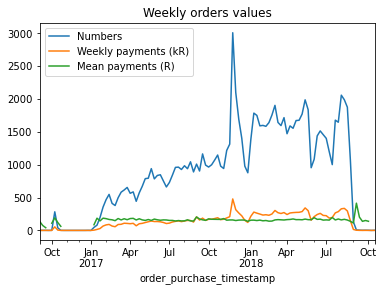

In [31]:
weekly_orders_payments = orders_payments.set_index('order_purchase_timestamp').resample('W')
weekly_orders_payments.count()['order_id'].plot(label='Numbers')
weekly_orders_payments.sum()['order_payment_value'].apply(lambda x: x/1000).plot(label='Weekly payments (kR)')
weekly_orders_payments.mean()['order_payment_value'].plot(label = 'Mean payments (R)')
plt.legend()
plt.title('Weekly orders values')

### Metric 3: Customer Satisfaction
❓ How does the `customer satisfaction` evolve on a monthly basis ? We will use the mean average `review_score` to illustrate the customer satisfaction.

👉 Load the `reviews` :

In [32]:
reviews = data['order_reviews'].copy()

In [33]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [34]:
#handle datetime
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])
reviews.set_index('review_creation_date', inplace=True)

📉 Customer satisfaction evolution over time

<AxesSubplot:xlabel='review_creation_date'>

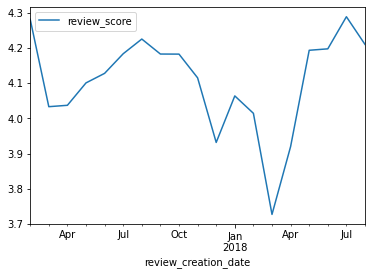

In [35]:
reviews.loc['2017-02-01':].resample('M').agg({'review_score':'mean'}).plot()